# PyTorch basic syntax

In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [8]:
data = [[1,2],[3,4]]
data_tensor = torch.tensor(data)
data_tensor

tensor([[1, 2],
        [3, 4]])

In [11]:
np_array = np.array(data)
np_array

array([[1, 2],
       [3, 4]])

In [13]:
np_to_torch = torch.from_numpy(np_array)
np_to_torch

tensor([[1, 2],
        [3, 4]])

In [16]:
# retain shape and dtype
data_ones = torch.ones_like(data_tensor)
data_ones

tensor([[1, 1],
        [1, 1]])

In [21]:
# override dtype
data_rd = torch.rand_like(data_tensor,dtype=torch.float)
data_rd

tensor([[0.7875, 0.4062],
        [0.5044, 0.6856]])

In [24]:
# use shape argument
shape = (2,3)
torch.ones(shape)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [25]:
data_tensor.shape

torch.Size([2, 2])

In [27]:
data_tensor.dtype

torch.int64

In [28]:
data_tensor.device

device(type='cpu')

In [31]:
# move tensor to the GPU
if torch.cuda.is_available():
    data_tensor = data_tensor.to("cuda")
print(data_tensor.device)

cpu


In [33]:
# indexing as in np
tensor = torch.ones((4,4))
tensor

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [34]:
tensor[:,1]=0
tensor

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [36]:
tensor[1,:]=0
tensor

tensor([[1., 0., 1., 1.],
        [0., 0., 0., 0.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [39]:
tensor[0,0]=0
tensor

tensor([[0., 0., 1., 1.],
        [0., 0., 0., 0.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [40]:
tensor_1 = torch.ones((2,2))
tensor_2 = torch.rand((2,3))

In [41]:
tensor_1

tensor([[1., 1.],
        [1., 1.]])

In [42]:
tensor_2

tensor([[0.9754, 0.1004, 0.9033],
        [0.8243, 0.6491, 0.0250]])

In [45]:
# same logic as np (dim=0 <=> row; dim=1 <=> col)
# join col:
torch.cat([tensor_1,tensor_2],dim=1)

tensor([[1.0000, 1.0000, 0.9754, 0.1004, 0.9033],
        [1.0000, 1.0000, 0.8243, 0.6491, 0.0250]])

In [48]:
# element wise multiplication
a = torch.tensor([[1,1],[0,2]])
b = torch.tensor([[2,0],[0,3]])
a.mul(b)

tensor([[2, 0],
        [0, 6]])

In [52]:
# matrix multiplication
a.matmul(b)

tensor([[2, 3],
        [0, 6]])

In [54]:
# transpose
a.T

tensor([[1, 0],
        [1, 2]])

In [62]:
# _ means in place. But don't use as a sequence of operations loses due to loss of history in 1 step
x = torch.ones((2,2))
x

tensor([[1., 1.],
        [1., 1.]])

In [64]:
x.add_(1)
x

tensor([[2., 2.],
        [2., 2.]])

In [65]:
# tensor and np array can share memory
t = torch.ones(4)
n = t.numpy()

In [66]:
t

tensor([1., 1., 1., 1.])

In [67]:
n

array([1., 1., 1., 1.], dtype=float32)

In [69]:
t.add_(1)

tensor([2., 2., 2., 2.])

In [70]:
t

tensor([2., 2., 2., 2.])

In [72]:
n

array([2., 2., 2., 2.], dtype=float32)

# NN example

In [83]:
# 1 image, 3 channels (RGB-red,green,blue), 64*64 image size
data = torch.rand((1,3,64,64))
data

tensor([[[[0.7701, 0.5282, 0.1959,  ..., 0.5843, 0.7040, 0.5865],
          [0.3337, 0.1397, 0.8170,  ..., 0.1442, 0.4962, 0.0146],
          [0.1951, 0.2062, 0.8093,  ..., 0.1732, 0.6314, 0.1931],
          ...,
          [0.8095, 0.8637, 0.4423,  ..., 0.4349, 0.7738, 0.1460],
          [0.7012, 0.5388, 0.6312,  ..., 0.1724, 0.8347, 0.0974],
          [0.0576, 0.9718, 0.5566,  ..., 0.1557, 0.7461, 0.1463]],

         [[0.9023, 0.6416, 0.2814,  ..., 0.3497, 0.4352, 0.6499],
          [0.9000, 0.2864, 0.6593,  ..., 0.4727, 0.4633, 0.9348],
          [0.1386, 0.3160, 0.3537,  ..., 0.8603, 0.2045, 0.6299],
          ...,
          [0.7903, 0.1693, 0.4159,  ..., 0.2493, 0.6801, 0.1917],
          [0.0131, 0.2765, 0.4253,  ..., 0.6150, 0.6628, 0.6594],
          [0.7185, 0.6169, 0.3200,  ..., 0.7262, 0.3757, 0.8491]],

         [[0.9024, 0.5588, 0.0535,  ..., 0.9445, 0.2147, 0.8620],
          [0.1343, 0.8519, 0.5843,  ..., 0.6688, 0.9530, 0.1860],
          [0.0964, 0.7108, 0.2442,  ..., 0

In [85]:
# these are the data labels, here we have 1 data point and 1000 classes (the output is a 1000 dimensional vector)
labels = torch.rand((1,1000))
labels

tensor([[0.0932, 0.2025, 0.0081, 0.3176, 0.1235, 0.9047, 0.5103, 0.8401, 0.5746,
         0.0446, 0.8631, 0.9703, 0.3116, 0.7227, 0.2201, 0.5255, 0.8889, 0.3561,
         0.8243, 0.1317, 0.9671, 0.5552, 0.2608, 0.6982, 0.1865, 0.6478, 0.8716,
         0.0151, 0.1851, 0.2226, 0.2478, 0.0864, 0.0244, 0.1307, 0.1772, 0.9178,
         0.0023, 0.6935, 0.9332, 0.4740, 0.0896, 0.7120, 0.7959, 0.6624, 0.2601,
         0.1812, 0.2809, 0.5999, 0.1512, 0.7307, 0.7124, 0.2777, 0.0691, 0.4693,
         0.5627, 0.1310, 0.0133, 0.5945, 0.0681, 0.1818, 0.9230, 0.6046, 0.8707,
         0.2679, 0.6730, 0.1425, 0.3262, 0.0500, 0.4356, 0.4081, 0.7472, 0.3364,
         0.3787, 0.9774, 0.0762, 0.2885, 0.2916, 0.4325, 0.5185, 0.5849, 0.1161,
         0.7132, 0.7153, 0.7947, 0.1600, 0.5208, 0.6365, 0.2667, 0.5697, 0.2690,
         0.9144, 0.3276, 0.1726, 0.7291, 0.2683, 0.8009, 0.3091, 0.9151, 0.4722,
         0.6018, 0.4228, 0.5073, 0.3243, 0.7807, 0.9491, 0.5585, 0.5494, 0.4452,
         0.7638, 0.5216, 0.6

In [88]:
# import a trained model for the sake of example
from torchvision.models import resnet18,ResNet18_Weights
model = resnet18(weights=ResNet18_Weights.DEFAULT)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/hasangenc/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [02:56<00:00, 266kB/s]   


In [101]:
# make a prediction using the model; called forward pass
prediction = model(data)
prediction

tensor([[-3.3883e-01, -3.5116e-01, -5.1105e-01, -1.5734e+00, -5.8412e-01,
         -1.7224e-01, -3.0610e-01,  6.6720e-01,  5.0943e-01, -9.7387e-01,
         -8.6990e-01, -7.9971e-01, -1.5345e-01, -1.0197e+00, -1.2863e+00,
         -5.0350e-01, -7.3868e-01, -6.2609e-01, -5.2103e-01, -5.9103e-01,
         -1.4038e+00, -7.0252e-01, -1.5133e+00,  3.5507e-01, -7.4719e-01,
         -1.0341e+00, -6.9787e-01, -1.1101e+00, -9.8166e-01, -5.3590e-01,
         -7.1462e-01, -9.4545e-01, -3.0123e-01, -4.2177e-01, -1.0193e-01,
         -2.4732e-01,  5.4783e-01, -7.1199e-01, -4.6749e-01,  3.4665e-01,
         -7.0091e-01, -2.5508e-01, -6.7576e-01, -2.6845e-02, -4.9121e-01,
         -1.7397e-01, -5.9058e-01, -2.5901e-01, -1.0072e+00, -8.2193e-01,
         -4.9367e-01,  5.3945e-01, -6.3880e-02, -6.9381e-01,  4.7064e-03,
         -1.0533e+00,  7.8266e-02, -1.2081e+00, -3.1127e-01, -3.4337e-01,
          8.4438e-01,  6.1056e-02,  2.0161e-01,  4.2644e-01, -5.2641e-01,
         -2.0488e-01, -4.2822e-02, -1.

In [102]:
# use the 1st norm as a loss function (shit loss function, for sake of example)
loss = (prediction-labels).sum()
loss

tensor(-496.1447, grad_fn=<SumBackward0>)

In [103]:
# computes the gradient of loss function wrt every parameter of the model
loss.backward()

In [106]:
# choose and load an optimizer
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [107]:
# implement gradient descent
optim.step()

# Prepare the data

In [3]:
data = pd.read_csv("data.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493547 entries, 0 to 493546
Data columns (total 61 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   gvkey                         493547 non-null  int64  
 1   datadate                      493547 non-null  object 
 2   fyear                         493547 non-null  int64  
 3   conm                          493547 non-null  object 
 4   tic                           493342 non-null  object 
 5   naicsh                        359031 non-null  float64
 6   revt                          397121 non-null  float64
 7   oibdp                         351514 non-null  float64
 8   ni                            356319 non-null  float64
 9   xint                          377682 non-null  float64
 10  dp                            385510 non-null  float64
 11  at                            399694 non-null  float64
 12  act                           334709 non-nul

In [5]:
# start with 8 inputs
data = data[["gvkey","datadate","gross_margin","cash_to_assets","quick_ratio","debt_to_assets"\
      ,"interest_coverage","roa","roe","asset_turnover","TL_flag"]]
data.head()

,gvkey,datadate,gross_margin,cash_to_assets,quick_ratio,debt_to_assets,interest_coverage,roa,roe,asset_turnover,TL_flag
0,1001,1980-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1001,1981-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1001,1982-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1001,1983-12-31,0.104351,0.303977,2.237324,0.345455,3.473132,0.080611,0.145085,1.803622,0
4,1001,1984-12-31,0.100228,0.122088,0.717745,0.293723,4.853253,0.069958,0.126981,1.967603,0


In [6]:
# drop rows with missing values
data = data.dropna().reset_index(drop=True)
data.head()

,gvkey,datadate,gross_margin,cash_to_assets,quick_ratio,debt_to_assets,interest_coverage,roa,roe,asset_turnover,TL_flag
0,1001,1983-12-31,0.104351,0.303977,2.237324,0.345455,3.473132,0.080611,0.145085,1.803622,0
1,1001,1984-12-31,0.100228,0.122088,0.717745,0.293723,4.853253,0.069958,0.126981,1.967603,0
2,1001,1985-12-31,0.134708,0.070566,0.200187,0.512571,4.198725,0.065223,0.197941,1.362147,0
3,1003,1982-12-31,0.149514,0.055575,0.250600,0.222479,17.017857,0.164950,0.468482,2.263494,0
4,1003,1983-12-31,0.155006,0.237191,1.363208,0.140696,16.446154,0.123109,0.172272,1.617188,0


In [7]:
# use index as identifier
inputs = data[["gross_margin","cash_to_assets","quick_ratio","debt_to_assets"\
      ,"interest_coverage","roa","roe","asset_turnover"]]
labels = pd.DataFrame(data["TL_flag"])
inputs = (inputs-inputs.mean())/inputs.std()

In [8]:
inputs = torch.tensor(inputs.values,dtype=torch.float32)
labels = torch.tensor(labels.values,dtype=torch.float32)

In [9]:
# 60% train, 20% val, 20% test

from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(
    inputs, labels,
    test_size=0.2,
    random_state=42,
    stratify=labels
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.25,    
    random_state=42,
    stratify=y_temp
)

# Functions

In [10]:
def train(mod,iter):
    
    mod.train()
    optimizer = torch.optim.Adam(mod.parameters(), lr=1e-3)
    criterion = nn.BCEWithLogitsLoss()

    for iteration in range(iter):
        mod.train()
        optimizer.zero_grad()   
        train_logits = mod(X_train)
        train_loss = criterion(train_logits,y_train)
        train_loss.backward()
        optimizer.step()

        net.eval()
        
        with torch.no_grad():
            val_logits = mod(X_val)            
            val_loss = criterion(val_logits, y_val)

        if iteration % 50 == 0:
            print(
            f"Iteration {iteration} | "
            f"Train Loss: {train_loss.item():.4f} | "
            f"Val Loss: {val_loss.item():.4f}"
            )

In [11]:
def evaluate(mod):
    
    mod.eval()
    with torch.no_grad():
        logits = mod(X_test)
    p = torch.sigmoid(logits)
    predictions = (p>0.5).int()
    
    m = confusion_matrix(y_test.int(),predictions)

    fpr, tpr, thresholds = roc_curve(y_test, p)
    auc = roc_auc_score(y_test, p)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
    plt.plot([0, 1], [0, 1], linestyle="--", label="Random")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

    return m

# 1 layer, 5 neurons

In [89]:
class model(nn.Module):   
    def __init__(self,input_dim):
        super(model, self).__init__()
        self.fc1 = nn.Linear(input_dim,5)
        self.out = nn.Linear(5,1)
    def forward(self,x):
        x = F.relu(self.fc1(x))
        return self.out(x)

In [90]:
net = model(input_dim=8)
net

model(
  (fc1): Linear(in_features=8, out_features=5, bias=True)
  (out): Linear(in_features=5, out_features=1, bias=True)
)

In [91]:
train(net,1000)

Iteration 0 | Train Loss: 0.7863 | Val Loss: 0.7833
Iteration 50 | Train Loss: 0.6749 | Val Loss: 0.6722
Iteration 100 | Train Loss: 0.5942 | Val Loss: 0.5918
Iteration 150 | Train Loss: 0.5329 | Val Loss: 0.5309
Iteration 200 | Train Loss: 0.4847 | Val Loss: 0.4829
Iteration 250 | Train Loss: 0.4444 | Val Loss: 0.4427
Iteration 300 | Train Loss: 0.4084 | Val Loss: 0.4068
Iteration 350 | Train Loss: 0.3758 | Val Loss: 0.3743
Iteration 400 | Train Loss: 0.3458 | Val Loss: 0.3444
Iteration 450 | Train Loss: 0.3172 | Val Loss: 0.3158
Iteration 500 | Train Loss: 0.2883 | Val Loss: 0.2870
Iteration 550 | Train Loss: 0.2590 | Val Loss: 0.2577
Iteration 600 | Train Loss: 0.2311 | Val Loss: 0.2300
Iteration 650 | Train Loss: 0.2066 | Val Loss: 0.2056
Iteration 700 | Train Loss: 0.1857 | Val Loss: 0.1848
Iteration 750 | Train Loss: 0.1681 | Val Loss: 0.1673
Iteration 800 | Train Loss: 0.1533 | Val Loss: 0.1526
Iteration 850 | Train Loss: 0.1407 | Val Loss: 0.1401
Iteration 900 | Train Loss: 0.1

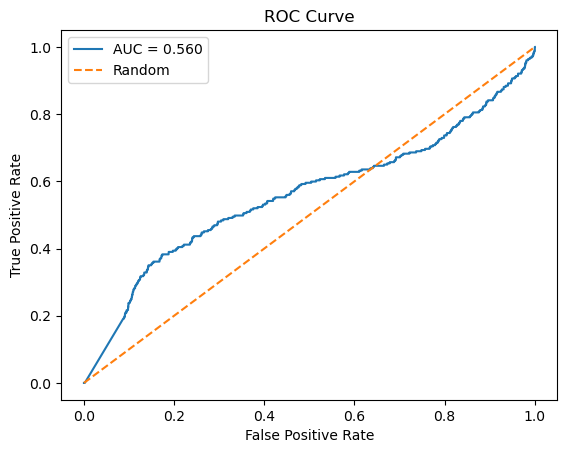

array([[52902,     0],
       [  277,     0]])

In [92]:
evaluate(net)

# 2 layers, 5 neurons

In [34]:
class model_2(nn.Module):   
    def __init__(self,input_dim):
        super(model_2, self).__init__()
        self.fc1 = nn.Linear(input_dim,5)
        self.fc2 = nn.Linear(5,5)
        self.out = nn.Linear(5,1)
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.out(x)

In [35]:
net = model_2(input_dim=8)
net

model_2(
  (fc1): Linear(in_features=8, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (out): Linear(in_features=5, out_features=1, bias=True)
)

In [93]:
train(net,1000)

Iteration 0 | Train Loss: 0.1129 | Val Loss: 0.1123
Iteration 50 | Train Loss: 0.1004 | Val Loss: 0.1000
Iteration 100 | Train Loss: 0.0902 | Val Loss: 0.0899
Iteration 150 | Train Loss: 0.0818 | Val Loss: 0.0815
Iteration 200 | Train Loss: 0.0745 | Val Loss: 0.0743
Iteration 250 | Train Loss: 0.0680 | Val Loss: 0.0680
Iteration 300 | Train Loss: 0.0626 | Val Loss: 0.0628
Iteration 350 | Train Loss: 0.0583 | Val Loss: 0.0586
Iteration 400 | Train Loss: 0.0549 | Val Loss: 0.0552
Iteration 450 | Train Loss: 0.0521 | Val Loss: 0.0524
Iteration 500 | Train Loss: 0.0497 | Val Loss: 0.0500
Iteration 550 | Train Loss: 0.0477 | Val Loss: 0.0480
Iteration 600 | Train Loss: 0.0459 | Val Loss: 0.0463
Iteration 650 | Train Loss: 0.0445 | Val Loss: 0.0448
Iteration 700 | Train Loss: 0.0432 | Val Loss: 0.0436
Iteration 750 | Train Loss: 0.0420 | Val Loss: 0.0425
Iteration 800 | Train Loss: 0.0411 | Val Loss: 0.0416
Iteration 850 | Train Loss: 0.0403 | Val Loss: 0.0408
Iteration 900 | Train Loss: 0.0

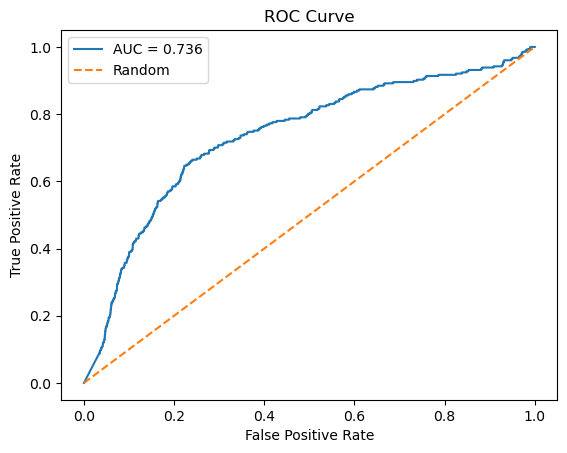

array([[52902,     0],
       [  277,     0]])

In [94]:
evaluate(net)

# 5 layers, 5 neurons

In [40]:
class model_3(nn.Module):   
    def __init__(self,input_dim):
        super(model_3, self).__init__()
        self.fc1 = nn.Linear(input_dim,5)
        self.fc2 = nn.Linear(5,5)
        self.fc3 = nn.Linear(5,5)
        self.fc4 = nn.Linear(5,5)
        self.fc5 = nn.Linear(5,5)
        self.out = nn.Linear(5,1)
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        return self.out(x)

In [41]:
net = model_3(input_dim=8)
net

model_3(
  (fc1): Linear(in_features=8, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=5, bias=True)
  (fc4): Linear(in_features=5, out_features=5, bias=True)
  (fc5): Linear(in_features=5, out_features=5, bias=True)
  (out): Linear(in_features=5, out_features=1, bias=True)
)

In [95]:
train(net,1000)

Iteration 0 | Train Loss: 0.0384 | Val Loss: 0.0389
Iteration 50 | Train Loss: 0.0370 | Val Loss: 0.0377
Iteration 100 | Train Loss: 0.0359 | Val Loss: 0.0368
Iteration 150 | Train Loss: 0.0352 | Val Loss: 0.0361
Iteration 200 | Train Loss: 0.0346 | Val Loss: 0.0356
Iteration 250 | Train Loss: 0.0342 | Val Loss: 0.0352
Iteration 300 | Train Loss: 0.0338 | Val Loss: 0.0349
Iteration 350 | Train Loss: 0.0335 | Val Loss: 0.0346
Iteration 400 | Train Loss: 0.0332 | Val Loss: 0.0343
Iteration 450 | Train Loss: 0.0329 | Val Loss: 0.0340
Iteration 500 | Train Loss: 0.0326 | Val Loss: 0.0337
Iteration 550 | Train Loss: 0.0323 | Val Loss: 0.0335
Iteration 600 | Train Loss: 0.0321 | Val Loss: 0.0332
Iteration 650 | Train Loss: 0.0319 | Val Loss: 0.0330
Iteration 700 | Train Loss: 0.0316 | Val Loss: 0.0327
Iteration 750 | Train Loss: 0.0313 | Val Loss: 0.0323
Iteration 800 | Train Loss: 0.0309 | Val Loss: 0.0318
Iteration 850 | Train Loss: 0.0306 | Val Loss: 0.0313
Iteration 900 | Train Loss: 0.0

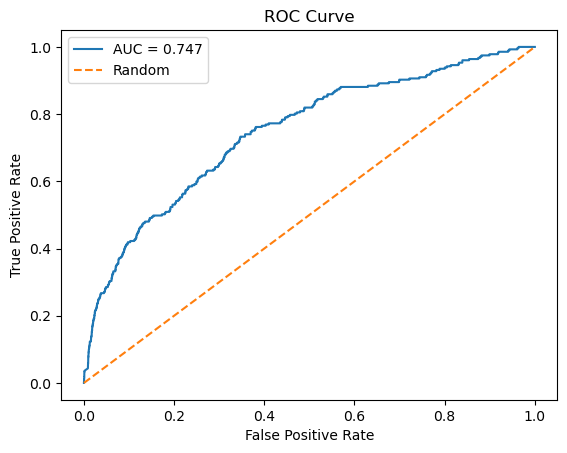

array([[52902,     0],
       [  277,     0]])

In [96]:
evaluate(net)

# 10 layers, 5 neurons

In [49]:
class model_4(nn.Module):   
    def __init__(self,input_dim):
        super(model_4, self).__init__()
        self.fc1 = nn.Linear(input_dim,5)
        self.fc2 = nn.Linear(5,5)
        self.fc3 = nn.Linear(5,5)
        self.fc4 = nn.Linear(5,5)
        self.fc5 = nn.Linear(5,5)
        self.fc6 = nn.Linear(5,5)
        self.fc7 = nn.Linear(5,5)
        self.fc8 = nn.Linear(5,5)
        self.fc9 = nn.Linear(5,5)
        self.fc10 = nn.Linear(5,5)
        self.out = nn.Linear(5,1)
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = F.relu(self.fc8(x))
        x = F.relu(self.fc9(x))
        x = F.relu(self.fc10(x))
        return self.out(x)

In [56]:
net = model_4(input_dim=8)
net

model_4(
  (fc1): Linear(in_features=8, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=5, bias=True)
  (fc4): Linear(in_features=5, out_features=5, bias=True)
  (fc5): Linear(in_features=5, out_features=5, bias=True)
  (fc6): Linear(in_features=5, out_features=5, bias=True)
  (fc7): Linear(in_features=5, out_features=5, bias=True)
  (fc8): Linear(in_features=5, out_features=5, bias=True)
  (fc9): Linear(in_features=5, out_features=5, bias=True)
  (fc10): Linear(in_features=5, out_features=5, bias=True)
  (out): Linear(in_features=5, out_features=1, bias=True)
)

In [97]:
train(net,1000)

Iteration 0 | Train Loss: 0.0302 | Val Loss: 0.0308
Iteration 50 | Train Loss: 0.0301 | Val Loss: 0.0307
Iteration 100 | Train Loss: 0.0300 | Val Loss: 0.0306
Iteration 150 | Train Loss: 0.0299 | Val Loss: 0.0305
Iteration 200 | Train Loss: 0.0299 | Val Loss: 0.0304
Iteration 250 | Train Loss: 0.0298 | Val Loss: 0.0304
Iteration 300 | Train Loss: 0.0297 | Val Loss: 0.0303
Iteration 350 | Train Loss: 0.0297 | Val Loss: 0.0303
Iteration 400 | Train Loss: 0.0296 | Val Loss: 0.0302
Iteration 450 | Train Loss: 0.0295 | Val Loss: 0.0302
Iteration 500 | Train Loss: 0.0295 | Val Loss: 0.0301
Iteration 550 | Train Loss: 0.0294 | Val Loss: 0.0300
Iteration 600 | Train Loss: 0.0294 | Val Loss: 0.0300
Iteration 650 | Train Loss: 0.0293 | Val Loss: 0.0299
Iteration 700 | Train Loss: 0.0293 | Val Loss: 0.0299
Iteration 750 | Train Loss: 0.0292 | Val Loss: 0.0298
Iteration 800 | Train Loss: 0.0290 | Val Loss: 0.0297
Iteration 850 | Train Loss: 0.0288 | Val Loss: 0.0295
Iteration 900 | Train Loss: 0.0

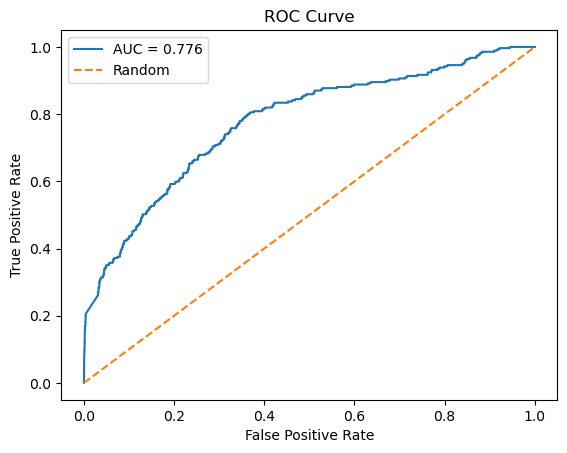

array([[52902,     0],
       [  277,     0]])

In [98]:
evaluate(net)

# 10 layers, Increase neurons from 5 to 20

In [11]:
class model_5(nn.Module):   
    def __init__(self,input_dim):
        super(model_5, self).__init__()
        self.fc1 = nn.Linear(input_dim,20)
        self.fc2 = nn.Linear(20,20)
        self.fc3 = nn.Linear(20,20)
        self.fc4 = nn.Linear(20,20)
        self.fc5 = nn.Linear(20,20)
        self.fc6 = nn.Linear(20,20)
        self.fc7 = nn.Linear(20,20)
        self.fc8 = nn.Linear(20,20)
        self.fc9 = nn.Linear(20,20)
        self.fc10 = nn.Linear(20,20)
        self.out = nn.Linear(20,1)
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = F.relu(self.fc8(x))
        x = F.relu(self.fc9(x))
        x = F.relu(self.fc10(x))
        return self.out(x)

In [12]:
net = model_5(input_dim=8)
net

model_5(
  (fc1): Linear(in_features=8, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=20, bias=True)
  (fc4): Linear(in_features=20, out_features=20, bias=True)
  (fc5): Linear(in_features=20, out_features=20, bias=True)
  (fc6): Linear(in_features=20, out_features=20, bias=True)
  (fc7): Linear(in_features=20, out_features=20, bias=True)
  (fc8): Linear(in_features=20, out_features=20, bias=True)
  (fc9): Linear(in_features=20, out_features=20, bias=True)
  (fc10): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=1, bias=True)
)

In [13]:
train(net,1000)

Iteration 0 | Train Loss: 0.7831 | Val Loss: 0.7795
Iteration 50 | Train Loss: 0.6417 | Val Loss: 0.6380
Iteration 100 | Train Loss: 0.0540 | Val Loss: 0.0553
Iteration 150 | Train Loss: 0.0354 | Val Loss: 0.0359
Iteration 200 | Train Loss: 0.0339 | Val Loss: 0.0343
Iteration 250 | Train Loss: 0.0330 | Val Loss: 0.0334
Iteration 300 | Train Loss: 0.0324 | Val Loss: 0.0328
Iteration 350 | Train Loss: 0.0319 | Val Loss: 0.0323
Iteration 400 | Train Loss: 0.0312 | Val Loss: 0.0317
Iteration 450 | Train Loss: 0.0299 | Val Loss: 0.0305
Iteration 500 | Train Loss: 0.0285 | Val Loss: 0.0293
Iteration 550 | Train Loss: 0.0266 | Val Loss: 0.0277
Iteration 600 | Train Loss: 0.0249 | Val Loss: 0.0268
Iteration 650 | Train Loss: 0.0239 | Val Loss: 0.0263
Iteration 700 | Train Loss: 0.0233 | Val Loss: 0.0261
Iteration 750 | Train Loss: 0.0228 | Val Loss: 0.0260
Iteration 800 | Train Loss: 0.0223 | Val Loss: 0.0260
Iteration 850 | Train Loss: 0.0218 | Val Loss: 0.0258
Iteration 900 | Train Loss: 0.0

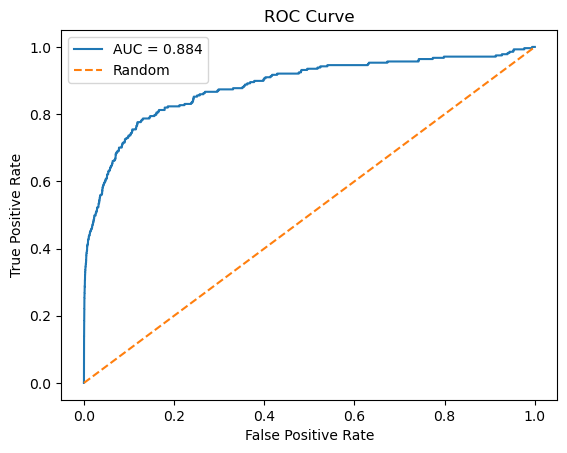

array([[52861,    41],
       [  221,    56]])

In [14]:
evaluate(net)

# 10 layers, Increase neurons from 20 to 30

In [24]:
class model_6(nn.Module):   
    def __init__(self,input_dim):
        super(model_6, self).__init__()
        self.fc1 = nn.Linear(input_dim,30)
        self.fc2 = nn.Linear(30,30)
        self.fc3 = nn.Linear(30,30)
        self.fc4 = nn.Linear(30,30)
        self.fc5 = nn.Linear(30,30)
        self.fc6 = nn.Linear(30,30)
        self.fc7 = nn.Linear(30,30)
        self.fc8 = nn.Linear(30,30)
        self.fc9 = nn.Linear(30,30)
        self.fc10 = nn.Linear(30,30)
        self.out = nn.Linear(30,1)
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = F.relu(self.fc8(x))
        x = F.relu(self.fc9(x))
        x = F.relu(self.fc10(x))
        return self.out(x)

In [25]:
net = model_6(input_dim=8)
net

model_6(
  (fc1): Linear(in_features=8, out_features=30, bias=True)
  (fc2): Linear(in_features=30, out_features=30, bias=True)
  (fc3): Linear(in_features=30, out_features=30, bias=True)
  (fc4): Linear(in_features=30, out_features=30, bias=True)
  (fc5): Linear(in_features=30, out_features=30, bias=True)
  (fc6): Linear(in_features=30, out_features=30, bias=True)
  (fc7): Linear(in_features=30, out_features=30, bias=True)
  (fc8): Linear(in_features=30, out_features=30, bias=True)
  (fc9): Linear(in_features=30, out_features=30, bias=True)
  (fc10): Linear(in_features=30, out_features=30, bias=True)
  (out): Linear(in_features=30, out_features=1, bias=True)
)

In [26]:
train(net,1000)

Iteration 0 | Train Loss: 0.7651 | Val Loss: 0.7597
Iteration 50 | Train Loss: 0.0429 | Val Loss: 0.0425
Iteration 100 | Train Loss: 0.0352 | Val Loss: 0.0358
Iteration 150 | Train Loss: 0.0326 | Val Loss: 0.0329
Iteration 200 | Train Loss: 0.0311 | Val Loss: 0.0314
Iteration 250 | Train Loss: 0.0303 | Val Loss: 0.0306
Iteration 300 | Train Loss: 0.0290 | Val Loss: 0.0296
Iteration 350 | Train Loss: 0.0266 | Val Loss: 0.0278
Iteration 400 | Train Loss: 0.0249 | Val Loss: 0.0264
Iteration 450 | Train Loss: 0.0236 | Val Loss: 0.0257
Iteration 500 | Train Loss: 0.0224 | Val Loss: 0.0255
Iteration 550 | Train Loss: 0.0216 | Val Loss: 0.0256
Iteration 600 | Train Loss: 0.0208 | Val Loss: 0.0256
Iteration 650 | Train Loss: 0.0202 | Val Loss: 0.0258
Iteration 700 | Train Loss: 0.0197 | Val Loss: 0.0261
Iteration 750 | Train Loss: 0.0192 | Val Loss: 0.0261
Iteration 800 | Train Loss: 0.0187 | Val Loss: 0.0268
Iteration 850 | Train Loss: 0.0217 | Val Loss: 0.0266
Iteration 900 | Train Loss: 0.0

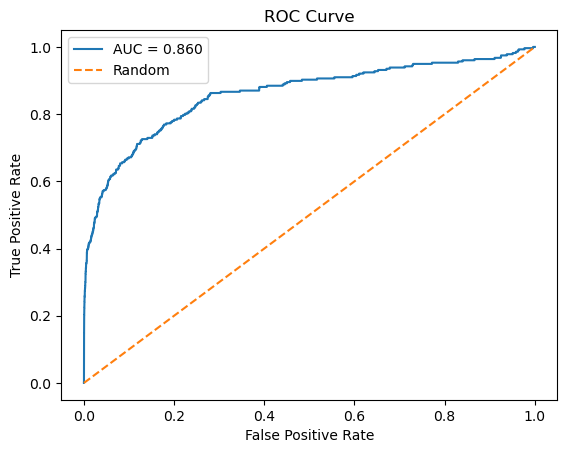

array([[52862,    40],
       [  217,    60]])

In [31]:
evaluate(net)

# 10 layers, Increase neurons from 30 to 40

In [32]:
class model_7(nn.Module):   
    def __init__(self,input_dim):
        super(model_7, self).__init__()
        self.fc1 = nn.Linear(input_dim,40)
        self.fc2 = nn.Linear(40,40)
        self.fc3 = nn.Linear(40,40)
        self.fc4 = nn.Linear(40,40)
        self.fc5 = nn.Linear(40,40)
        self.fc6 = nn.Linear(40,40)
        self.fc7 = nn.Linear(40,40)
        self.fc8 = nn.Linear(40,40)
        self.fc9 = nn.Linear(40,40)
        self.fc10 = nn.Linear(40,40)
        self.out = nn.Linear(40,1)
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = F.relu(self.fc8(x))
        x = F.relu(self.fc9(x))
        x = F.relu(self.fc10(x))
        return self.out(x)

In [33]:
net = model_7(input_dim=8)
net

model_7(
  (fc1): Linear(in_features=8, out_features=40, bias=True)
  (fc2): Linear(in_features=40, out_features=40, bias=True)
  (fc3): Linear(in_features=40, out_features=40, bias=True)
  (fc4): Linear(in_features=40, out_features=40, bias=True)
  (fc5): Linear(in_features=40, out_features=40, bias=True)
  (fc6): Linear(in_features=40, out_features=40, bias=True)
  (fc7): Linear(in_features=40, out_features=40, bias=True)
  (fc8): Linear(in_features=40, out_features=40, bias=True)
  (fc9): Linear(in_features=40, out_features=40, bias=True)
  (fc10): Linear(in_features=40, out_features=40, bias=True)
  (out): Linear(in_features=40, out_features=1, bias=True)
)

In [35]:
train(net,1000)

Iteration 0 | Train Loss: 0.7233 | Val Loss: 0.7178
Iteration 50 | Train Loss: 0.0568 | Val Loss: 0.0635
Iteration 100 | Train Loss: 0.0347 | Val Loss: 0.0352
Iteration 150 | Train Loss: 0.0325 | Val Loss: 0.0327
Iteration 200 | Train Loss: 0.0315 | Val Loss: 0.0318
Iteration 250 | Train Loss: 0.0301 | Val Loss: 0.0306
Iteration 300 | Train Loss: 0.0282 | Val Loss: 0.0289
Iteration 350 | Train Loss: 0.0262 | Val Loss: 0.0274
Iteration 400 | Train Loss: 0.0246 | Val Loss: 0.0265
Iteration 450 | Train Loss: 0.0232 | Val Loss: 0.0259
Iteration 500 | Train Loss: 0.0218 | Val Loss: 0.0257
Iteration 550 | Train Loss: 0.0207 | Val Loss: 0.0258
Iteration 600 | Train Loss: 0.0197 | Val Loss: 0.0256
Iteration 650 | Train Loss: 0.0215 | Val Loss: 0.0261
Iteration 700 | Train Loss: 0.0187 | Val Loss: 0.0260
Iteration 750 | Train Loss: 0.0183 | Val Loss: 0.0262
Iteration 800 | Train Loss: 0.0178 | Val Loss: 0.0265
Iteration 850 | Train Loss: 0.0191 | Val Loss: 0.0259
Iteration 900 | Train Loss: 0.0

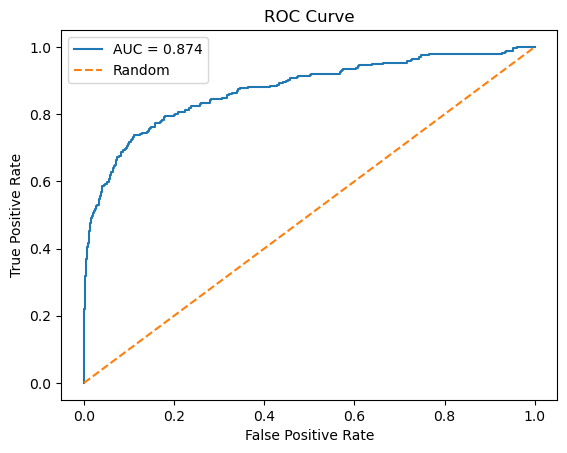

array([[52840,    62],
       [  216,    61]])

In [36]:
evaluate(net)

# 15 layers, 40 neurons

In [19]:
class model_8(nn.Module):   
    def __init__(self,input_dim):
        super(model_8, self).__init__()
        self.fc1 = nn.Linear(input_dim,40)
        self.fc2 = nn.Linear(40,40)
        self.fc3 = nn.Linear(40,40)
        self.fc4 = nn.Linear(40,40)
        self.fc5 = nn.Linear(40,40)
        self.fc6 = nn.Linear(40,40)
        self.fc7 = nn.Linear(40,40)
        self.fc8 = nn.Linear(40,40)
        self.fc9 = nn.Linear(40,40)
        self.fc10 = nn.Linear(40,40)
        self.fc11 = nn.Linear(40,40)
        self.fc12 = nn.Linear(40,40)
        self.fc13 = nn.Linear(40,40)
        self.fc14 = nn.Linear(40,40)
        self.fc15 = nn.Linear(40,40)
        self.out = nn.Linear(40,1)
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = F.relu(self.fc8(x))
        x = F.relu(self.fc9(x))
        x = F.relu(self.fc10(x))
        x = F.relu(self.fc11(x))
        x = F.relu(self.fc12(x))
        x = F.relu(self.fc13(x))
        x = F.relu(self.fc14(x))
        x = F.relu(self.fc15(x))
        return self.out(x)

In [20]:
net = model_8(input_dim=8)
net

model_8(
  (fc1): Linear(in_features=8, out_features=40, bias=True)
  (fc2): Linear(in_features=40, out_features=40, bias=True)
  (fc3): Linear(in_features=40, out_features=40, bias=True)
  (fc4): Linear(in_features=40, out_features=40, bias=True)
  (fc5): Linear(in_features=40, out_features=40, bias=True)
  (fc6): Linear(in_features=40, out_features=40, bias=True)
  (fc7): Linear(in_features=40, out_features=40, bias=True)
  (fc8): Linear(in_features=40, out_features=40, bias=True)
  (fc9): Linear(in_features=40, out_features=40, bias=True)
  (fc10): Linear(in_features=40, out_features=40, bias=True)
  (fc11): Linear(in_features=40, out_features=40, bias=True)
  (fc12): Linear(in_features=40, out_features=40, bias=True)
  (fc13): Linear(in_features=40, out_features=40, bias=True)
  (fc14): Linear(in_features=40, out_features=40, bias=True)
  (fc15): Linear(in_features=40, out_features=40, bias=True)
  (out): Linear(in_features=40, out_features=1, bias=True)
)

In [21]:
train(net,1000)

Iteration 0 | Train Loss: 0.6315 | Val Loss: 0.6278
Iteration 50 | Train Loss: 0.0674 | Val Loss: 0.0761
Iteration 100 | Train Loss: 0.0334 | Val Loss: 0.0337
Iteration 150 | Train Loss: 0.0317 | Val Loss: 0.0319
Iteration 200 | Train Loss: 0.0299 | Val Loss: 0.0303
Iteration 250 | Train Loss: 0.0272 | Val Loss: 0.0284
Iteration 300 | Train Loss: 0.0245 | Val Loss: 0.0264
Iteration 350 | Train Loss: 0.0226 | Val Loss: 0.0255
Iteration 400 | Train Loss: 0.0212 | Val Loss: 0.0254
Iteration 450 | Train Loss: 0.0215 | Val Loss: 0.0275
Iteration 500 | Train Loss: 0.0202 | Val Loss: 0.0253
Iteration 550 | Train Loss: 0.0196 | Val Loss: 0.0256
Iteration 600 | Train Loss: 0.0191 | Val Loss: 0.0255
Iteration 650 | Train Loss: 0.0192 | Val Loss: 0.0251
Iteration 700 | Train Loss: 0.0199 | Val Loss: 0.0257
Iteration 750 | Train Loss: 0.0199 | Val Loss: 0.0263
Iteration 800 | Train Loss: 0.0180 | Val Loss: 0.0262
Iteration 850 | Train Loss: 0.0181 | Val Loss: 0.0263
Iteration 900 | Train Loss: 0.0

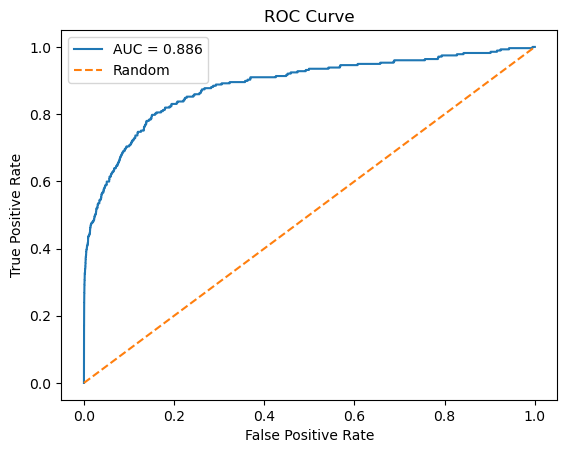

array([[52848,    54],
       [  199,    78]])

In [22]:
evaluate(net)

# 15 layers, 50 neurons

In [23]:
class model_9(nn.Module):   
    def __init__(self,input_dim):
        super(model_9, self).__init__()
        self.fc1 = nn.Linear(input_dim,50)
        self.fc2 = nn.Linear(50,50)
        self.fc3 = nn.Linear(50,50)
        self.fc4 = nn.Linear(50,50)
        self.fc5 = nn.Linear(50,50)
        self.fc6 = nn.Linear(50,50)
        self.fc7 = nn.Linear(50,50)
        self.fc8 = nn.Linear(50,50)
        self.fc9 = nn.Linear(50,50)
        self.fc10 = nn.Linear(50,50)
        self.fc11 = nn.Linear(50,50)
        self.fc12 = nn.Linear(50,50)
        self.fc13 = nn.Linear(50,50)
        self.fc14 = nn.Linear(50,50)
        self.fc15 = nn.Linear(50,50)
        self.out = nn.Linear(50,1)
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = F.relu(self.fc8(x))
        x = F.relu(self.fc9(x))
        x = F.relu(self.fc10(x))
        x = F.relu(self.fc11(x))
        x = F.relu(self.fc12(x))
        x = F.relu(self.fc13(x))
        x = F.relu(self.fc14(x))
        x = F.relu(self.fc15(x))
        return self.out(x)

In [24]:
net=model_9(input_dim=8)
net

model_9(
  (fc1): Linear(in_features=8, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=50, bias=True)
  (fc5): Linear(in_features=50, out_features=50, bias=True)
  (fc6): Linear(in_features=50, out_features=50, bias=True)
  (fc7): Linear(in_features=50, out_features=50, bias=True)
  (fc8): Linear(in_features=50, out_features=50, bias=True)
  (fc9): Linear(in_features=50, out_features=50, bias=True)
  (fc10): Linear(in_features=50, out_features=50, bias=True)
  (fc11): Linear(in_features=50, out_features=50, bias=True)
  (fc12): Linear(in_features=50, out_features=50, bias=True)
  (fc13): Linear(in_features=50, out_features=50, bias=True)
  (fc14): Linear(in_features=50, out_features=50, bias=True)
  (fc15): Linear(in_features=50, out_features=50, bias=True)
  (out): Linear(in_features=50, out_features=1, bias=True)
)

In [25]:
train(net,1000)

Iteration 0 | Train Loss: 0.6372 | Val Loss: 0.6334
Iteration 50 | Train Loss: 0.0742 | Val Loss: 0.0699
Iteration 100 | Train Loss: 0.0323 | Val Loss: 0.0324
Iteration 150 | Train Loss: 0.0305 | Val Loss: 0.0308
Iteration 200 | Train Loss: 0.0271 | Val Loss: 0.0281
Iteration 250 | Train Loss: 0.0243 | Val Loss: 0.0258
Iteration 300 | Train Loss: 0.0222 | Val Loss: 0.0245
Iteration 350 | Train Loss: 0.0208 | Val Loss: 0.0246
Iteration 400 | Train Loss: 0.0196 | Val Loss: 0.0240
Iteration 450 | Train Loss: 0.0204 | Val Loss: 0.0242
Iteration 500 | Train Loss: 0.0181 | Val Loss: 0.0247
Iteration 550 | Train Loss: 0.0176 | Val Loss: 0.0247
Iteration 600 | Train Loss: 0.0173 | Val Loss: 0.0250
Iteration 650 | Train Loss: 0.0172 | Val Loss: 0.0263
Iteration 700 | Train Loss: 0.0168 | Val Loss: 0.0256
Iteration 750 | Train Loss: 0.0166 | Val Loss: 0.0264
Iteration 800 | Train Loss: 0.0199 | Val Loss: 0.0257
Iteration 850 | Train Loss: 0.0188 | Val Loss: 0.0271
Iteration 900 | Train Loss: 0.0

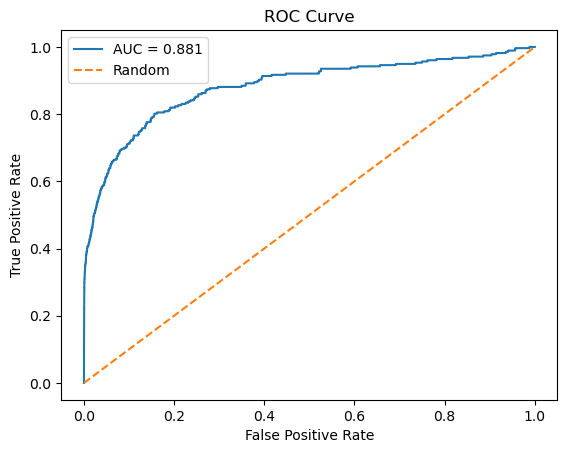

array([[52856,    46],
       [  196,    81]])

In [26]:
evaluate(net)

# 15 layers, 60 neurons

In [31]:
class model_10(nn.Module):   
    def __init__(self,input_dim):
        super(model_10, self).__init__()
        self.fc1 = nn.Linear(input_dim,60)
        self.fc2 = nn.Linear(60,60)
        self.fc3 = nn.Linear(60,60)
        self.fc4 = nn.Linear(60,60)
        self.fc5 = nn.Linear(60,60)
        self.fc6 = nn.Linear(60,60)
        self.fc7 = nn.Linear(60,60)
        self.fc8 = nn.Linear(60,60)
        self.fc9 = nn.Linear(60,60)
        self.fc10 = nn.Linear(60,60)
        self.fc11 = nn.Linear(60,60)
        self.fc12 = nn.Linear(60,60)
        self.fc13 = nn.Linear(60,60)
        self.fc14 = nn.Linear(60,60)
        self.fc15 = nn.Linear(60,60)
        self.out = nn.Linear(60,1)
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = F.relu(self.fc8(x))
        x = F.relu(self.fc9(x))
        x = F.relu(self.fc10(x))
        x = F.relu(self.fc11(x))
        x = F.relu(self.fc12(x))
        x = F.relu(self.fc13(x))
        x = F.relu(self.fc14(x))
        x = F.relu(self.fc15(x))
        return self.out(x)

In [32]:
net=model_10(input_dim=8)
net

model_10(
  (fc1): Linear(in_features=8, out_features=60, bias=True)
  (fc2): Linear(in_features=60, out_features=60, bias=True)
  (fc3): Linear(in_features=60, out_features=60, bias=True)
  (fc4): Linear(in_features=60, out_features=60, bias=True)
  (fc5): Linear(in_features=60, out_features=60, bias=True)
  (fc6): Linear(in_features=60, out_features=60, bias=True)
  (fc7): Linear(in_features=60, out_features=60, bias=True)
  (fc8): Linear(in_features=60, out_features=60, bias=True)
  (fc9): Linear(in_features=60, out_features=60, bias=True)
  (fc10): Linear(in_features=60, out_features=60, bias=True)
  (fc11): Linear(in_features=60, out_features=60, bias=True)
  (fc12): Linear(in_features=60, out_features=60, bias=True)
  (fc13): Linear(in_features=60, out_features=60, bias=True)
  (fc14): Linear(in_features=60, out_features=60, bias=True)
  (fc15): Linear(in_features=60, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=1, bias=True)
)

In [33]:
train(net,1000)

Iteration 0 | Train Loss: 0.7711 | Val Loss: 0.7652
Iteration 50 | Train Loss: 0.0605 | Val Loss: 0.0549
Iteration 100 | Train Loss: 0.0327 | Val Loss: 0.0328
Iteration 150 | Train Loss: 0.0319 | Val Loss: 0.0320
Iteration 200 | Train Loss: 0.0285 | Val Loss: 0.0293
Iteration 250 | Train Loss: 0.0247 | Val Loss: 0.0262
Iteration 300 | Train Loss: 0.0221 | Val Loss: 0.0259
Iteration 350 | Train Loss: 0.0211 | Val Loss: 0.0263
Iteration 400 | Train Loss: 0.0196 | Val Loss: 0.0248
Iteration 450 | Train Loss: 0.0197 | Val Loss: 0.0249
Iteration 500 | Train Loss: 0.0290 | Val Loss: 0.0327
Iteration 550 | Train Loss: 0.0185 | Val Loss: 0.0252
Iteration 600 | Train Loss: 0.0181 | Val Loss: 0.0259
Iteration 650 | Train Loss: 0.0180 | Val Loss: 0.0255
Iteration 700 | Train Loss: 0.0285 | Val Loss: 0.0305
Iteration 750 | Train Loss: 0.0183 | Val Loss: 0.0254
Iteration 800 | Train Loss: 0.0173 | Val Loss: 0.0256
Iteration 850 | Train Loss: 0.0166 | Val Loss: 0.0261
Iteration 900 | Train Loss: 0.0

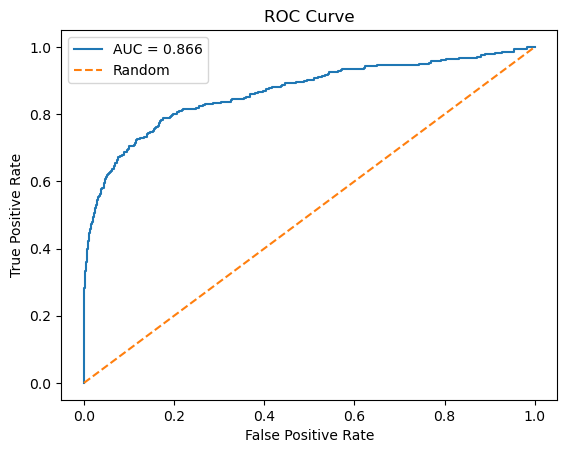

array([[52824,    78],
       [  195,    82]])

In [35]:
evaluate(net)

# 20 layers, 60 neurons

In [ ]:
class model_11(nn.Module):   
    def __init__(self,input_dim):
        super(model_11, self).__init__()
        self.fc1 = nn.Linear(input_dim,60)
        self.fc2 = nn.Linear(60,60)
        self.fc3 = nn.Linear(60,60)
        self.fc4 = nn.Linear(60,60)
        self.fc5 = nn.Linear(60,60)
        self.fc6 = nn.Linear(60,60)
        self.fc7 = nn.Linear(60,60)
        self.fc8 = nn.Linear(60,60)
        self.fc9 = nn.Linear(60,60)
        self.fc10 = nn.Linear(60,60)
        self.fc11 = nn.Linear(60,60)
        self.fc12 = nn.Linear(60,60)
        self.fc13 = nn.Linear(60,60)
        self.fc14 = nn.Linear(60,60)
        self.fc15 = nn.Linear(60,60)
        self.fc16 = nn.Linear(60,60)
        self.fc17 = nn.Linear(60,60)
        self.fc18 = nn.Linear(60,60)
        self.fc19 = nn.Linear(60,60)
        self.fc20 = nn.Linear(60,60)
        self.out = nn.Linear(60,1)
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = F.relu(self.fc8(x))
        x = F.relu(self.fc9(x))
        x = F.relu(self.fc10(x))
        x = F.relu(self.fc11(x))
        x = F.relu(self.fc12(x))
        x = F.relu(self.fc13(x))
        x = F.relu(self.fc14(x))
        x = F.relu(self.fc15(x))
        x = F.relu(self.fc16(x))
        x = F.relu(self.fc17(x))
        x = F.relu(self.fc18(x))
        x = F.relu(self.fc19(x))
        x = F.relu(self.fc20(x))
        return self.out(x)

In [ ]:
net=model_11(input_dim=8)
net

In [ ]:
train(net,1000)

In [ ]:
evaluate(net)

# Notes

notes for discussion
* quick convergence, maybe lower learning rate?
* other architechtures